## Case Study Introduction 

### Life Expectancy

In [2]:
#Caution: If you don't understand my code, it's fine!  
#I just want you to get a feeling what you will achieve at the end

#if you want to create new cell, press B
#if you want to delete cell, press D D

#if you want to conver a code cell to markdown cell, press M

### 1. Load the data (ETL)

In [6]:
#to load the data, there are many ways
#most common is to use a library called Pandas
#Pandas is like Excel

#first thing first, import pandas

import pandas as pd

#if you want to run the code, press Shift-Enter

In [7]:
#read the csv file
#pandas called its data "DataFrame"
df = pd.read_csv('Life_Expectancy_Data.csv')

#pd.read

In [8]:
#let's take a look at some rows.....to make sense of the data
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


I gonna take notes the problem of my dataset
- Status need to be integers
- I don't know what is adult mortality
- I also don't know what is infant deaths 

I also learn something
- Life expectancy is my label --> the thing I want to predict

### 2. Exploratory Data Analysis (EDA)

In [9]:
#the first command you wanna do right away is
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [10]:
#tells you the data type
df.info()

#we usually like float and int, we DON'T LIKE object.  Usually object means strings.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [12]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [13]:
df['Status'].count()

2938

In [14]:
#how many rows i have?
df.shape  #with no ()  ==> 2938 rows, and 22 columns

(2938, 22)

In [15]:
#why shape has no () but count and unique has ()
#here anything with () is called function
#anything without () is called attributes

In [16]:
#I want to explore more, in form of graphs!

#how?

#many ways

#I gonna use seaborn - which is a refined version of matplotlib

import seaborn as sns

/Users/chaklam/DSAI/Environments/teaching_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Status', ylabel='count'>

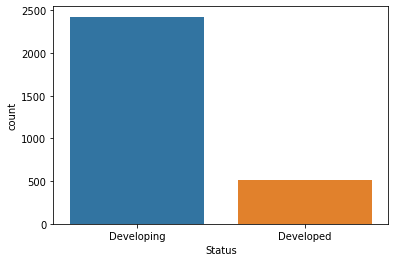

In [17]:
sns.countplot(df['Status'])  #mostly for visualizing discrete features

In [26]:
df = df.rename(
    columns = {'Life expectancy ': 'life-exp'}
)

df.columns

Index(['Country', 'Year', 'Status', 'life-exp', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

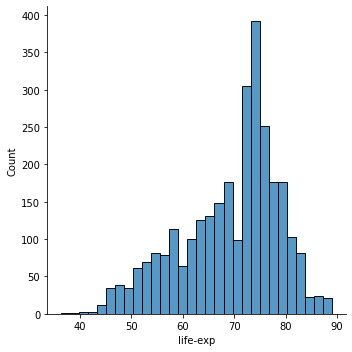

In [27]:
#I want to visualize continuous features, e.g., life-exp
sns.displot(df['life-exp'])

In [28]:
##what if I want to compare two variables, maybe feature vs. label

#if your feature is discrete, use bar graph

#if your feature is continuous, use scatter plot

In [29]:
df.columns

Index(['Country', 'Year', 'Status', 'life-exp', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [31]:
print(sns.__version__)

0.11.0


<AxesSubplot:xlabel='Status', ylabel='life-exp'>

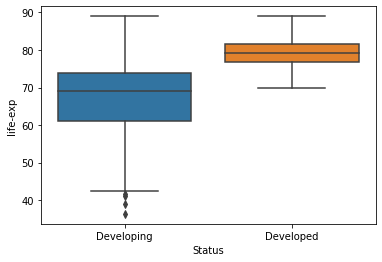

In [30]:
#if my feature is Status - discrete, to see whether Status has an impact, we use bar graph
#btw, x is feature, y means labels  - this is universal definition
sns.boxplot(x = df['Status'], y = df['life-exp'])

In [33]:
#task 1: can you rename thinness 1-19 for me
df.columns

Index(['Country', 'Year', 'Status', 'life-exp', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
#if my feature is continuous, e.g., to see whether eud

### 3. Preprocessing / Cleaning
- missing values
- create new columns - feature engineering
  - E.g., column called stock price, i can feature engineer a new column called MACD
- convert string to integers

### 4. Feature Extraction

- I use weight and height to predict obseity
- Weight and height are called *features, X, independent variables, factors*
- Obseity is what we want to predict - is/are called *labels / targets / dependent variables / outcomes*

What do I mean by feature extraction?

- choose columns
- How do we know which feature is good?
  - Correlation analysis with the label - mostly used for continuous features
  - ANOVA or t-test - statistical test to know whether the factor is important - mostly used for discrete features

### 5.  Modeling

- Compare different machine learning models and/or hyperparameters
- what do i mean by hyperparameters - parameters of the machine learning models
- Cross-validation
- Grid-search

### 6. Testing / Inference

- test with a separate test set to get "real" accuracy

### 7. Deploy 

- 1. you need to make an API - how?  ---> best tool is called FastAPI
- 2. you need to host this API somewhere in the internet
  - Free option: Heroku
  - Not free option: AWS EC2,  Google Cloud, Azure ML, Digital Ocean (cloud server)